In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('clean_dataset.csv', sep=',',index_col=0, header=0)
df.head()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
0,47.11,-122.57,12,11,81.71997,12.86919,0.886940,5,10.0,1010.6,722,0,0,0,1
1,47.11,-122.57,12,13,96.64917,9.66415,0.901270,0,10.0,1011.3,23,0,0,0,1
2,47.11,-122.57,12,13,93.61572,15.44983,1.497021,5,10.0,1011.6,32,0,0,0,1
3,47.11,-122.57,12,12,77.21558,10.36659,0.502979,5,2.0,1024.4,6,0,0,0,1
4,47.11,-122.57,12,14,54.80347,16.85471,1.883942,3,3.0,1023.7,9,0,0,0,1


### Input/Target Variable Split

In [4]:
X = df.drop(['PolyPwr'], axis=1)
X.shape

(21045, 14)

In [5]:
y = df['PolyPwr']
y.shape

(21045,)

# Baseline Regression Models

### Decision Tree Regression 

In [6]:
from sklearn.tree import DecisionTreeRegressor

kfoldcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
power_dt = DecisionTreeRegressor()
dt_scores = cross_val_score(power_dt, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 17s

In [7]:
dt_scores

array([0.31317305, 0.29616485, 0.32629113, 0.32860772, 0.33103677,
       0.39599964, 0.35305671, 0.31358957, 0.30638933, 0.28142008,
       0.27750216, 0.30955522, 0.30787216, 0.3544718 , 0.29217948,
       0.28819343, 0.36264479, 0.35599365, 0.31763987, 0.31663426,
       0.33508131, 0.32058203, 0.30609811, 0.25411402, 0.33067546,
       0.32433377, 0.3588053 , 0.28269884, 0.35073156, 0.32907328,
       0.38771642, 0.29552834, 0.26292906, 0.28218681, 0.29863945,
       0.34597678, 0.32725955, 0.32135628, 0.21336039, 0.34165923,
       0.32176538, 0.36609073, 0.30660808, 0.29834793, 0.3395127 ,
       0.28420336, 0.40541605, 0.219549  , 0.20475598, 0.35447744,
       0.39136191, 0.32492911, 0.31345857, 0.2959595 , 0.33861607,
       0.27462781, 0.31804557, 0.37581803, 0.2637729 , 0.29204455,
       0.34531529, 0.31198103, 0.37797843, 0.25170866, 0.32060701,
       0.29355154, 0.38126963, 0.27603413, 0.3364681 , 0.35762256,
       0.36664655, 0.27754789, 0.3022382 , 0.3277507 , 0.29737

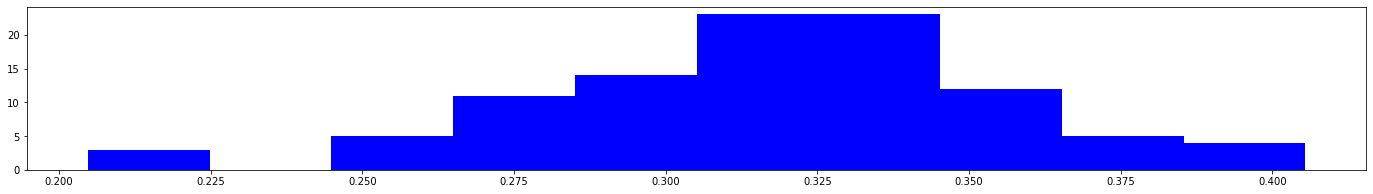

In [8]:
plt.figure(figsize=(24,3))
plt.hist(dt_scores, color='blue')
plt.show()

In [19]:
dt_meanscore = np.mean(dt_scores)

### Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor

power_rf = RandomForestRegressor()
rf_scores = cross_val_score(power_rf, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 19m 9s

In [10]:
rf_scores

array([0.63799286, 0.63877934, 0.64229928, 0.63713272, 0.68438162,
       0.66516719, 0.66290306, 0.6479341 , 0.64381528, 0.61965659,
       0.62452719, 0.65064622, 0.62591033, 0.65342853, 0.62525562,
       0.662832  , 0.65044401, 0.6696666 , 0.64547324, 0.64820079,
       0.65354221, 0.64022097, 0.65743947, 0.61860334, 0.65656049,
       0.65820575, 0.67526673, 0.62248834, 0.67853587, 0.6185326 ,
       0.65659726, 0.64531673, 0.63500108, 0.64500341, 0.62867848,
       0.65184757, 0.67144227, 0.66186489, 0.62451597, 0.64737289,
       0.64606128, 0.64629104, 0.6466135 , 0.66199707, 0.63723692,
       0.64072256, 0.67952133, 0.63169597, 0.61030828, 0.6674166 ,
       0.64934835, 0.63725389, 0.6498257 , 0.63978377, 0.68003858,
       0.640265  , 0.64870395, 0.65401595, 0.6235568 , 0.64110647,
       0.67150319, 0.65780781, 0.64527543, 0.63713499, 0.64470042,
       0.65218336, 0.65427785, 0.63520511, 0.63980228, 0.64872012,
       0.66192974, 0.62637679, 0.62660573, 0.6619016 , 0.63423

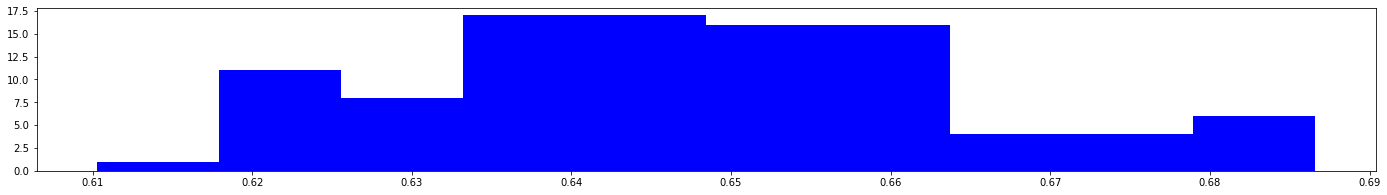

In [11]:
plt.figure(figsize=(24,3))
plt.hist(rf_scores, color='blue')
plt.show()

In [18]:
rf_meanscore = np.mean(rf_scores)

### Support Vector Regression

In [12]:
from sklearn.svm import SVR

power_svr = SVR()
svr_scores = cross_val_score(power_svr, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 49m 26s

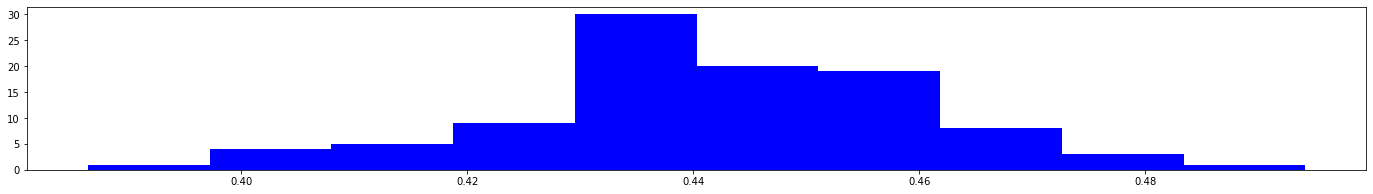

In [13]:
plt.figure(figsize=(24,3))
plt.hist(svr_scores, color='blue')
plt.show()

In [42]:
svr_meanscore = np.mean(svr_scores)

### K-Nearest Neighbors Regression 

In [14]:
from sklearn.neighbors import KNeighborsRegressor

power_knn = KNeighborsRegressor(11)
knn_scores = cross_val_score(power_knn, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 12s

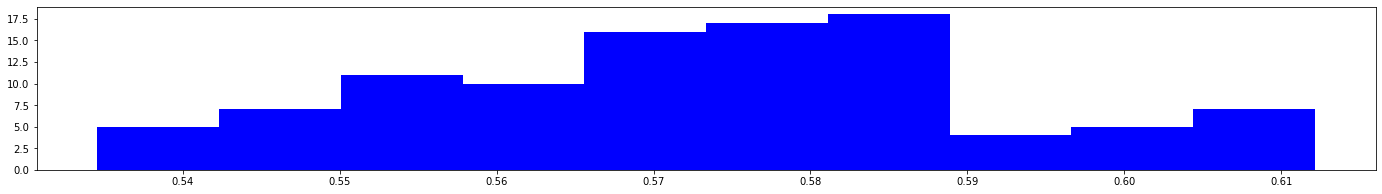

In [15]:
plt.figure(figsize=(24,3))
plt.hist(knn_scores, color='blue')
plt.show()

In [44]:
knn_meanscore = np.mean(knn_scores)

# Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [21]:
# Decision Tree
dtr_params = {'max_depth':np.arange(1,20), 'max_features':np.arange(1,15), 'min_samples_leaf':np.arange(5,100,5)}
hyp_dtr = GridSearchCV(dtr, param_grid=dtr_params, cv=5)
hyp_dtr.fit(X, y)
hyp_dtr.best_params_

# Runtime = 16m 28s

{'max_depth': 18, 'max_features': 11, 'min_samples_leaf': 85}

In [23]:
# Random Forest
rfr_params = {'max_features':np.arange(1,15), 'min_samples_leaf':np.arange(5,100,5), 'n_estimators':[50,100,150,200]}
hyp_rfr = GridSearchCV(rfr, param_grid=rfr_params, cv=2)
hyp_rfr.fit(X, y)
hyp_rfr.best_params_

# Reduced cv from 5 to 2 due to time constraints. Model at first iteration took too long (cv=5 took 5+ hrs).
# Runtime = ~2h

{'max_features': 3, 'min_samples_leaf': 25, 'n_estimators': 50}

In [25]:
# Support Vector
svr_params = {'C': [0.1, 1, 10, 100, 1000]}
hyp_svr = GridSearchCV(svr, param_grid=svr_params, cv=5)
hyp_svr.fit(X, y)
hyp_svr.best_params_

# Runtime = ~11m

{'C': 1000}

In [28]:
%%time
# KNN
knn_params = {'n_neighbors':np.arange(1, 50), 'p':[1,2], 'weights': ['uniform', 'distance']}
hyp_knn = GridSearchCV(knn, param_grid=knn_params, cv=5)
hyp_knn.fit(X, y)
hyp_knn.best_params_

# Runtime = 5m 2s

CPU times: total: 4min 52s
Wall time: 5min 2s


{'n_neighbors': 49, 'p': 1, 'weights': 'distance'}

# New Model Iteration

### Decision Tree Regression

In [29]:
%%time
from sklearn.tree import DecisionTreeRegressor

kfoldcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
power_hpdt = DecisionTreeRegressor(max_depth=18, max_features=11, min_samples_leaf=85)
hpdt_scores = cross_val_score(power_hpdt, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 9s

CPU times: total: 7.78 s
Wall time: 8.67 s


In [30]:
hpdt_scores

array([0.54690489, 0.57538956, 0.55103817, 0.5588774 , 0.60926131,
       0.5863569 , 0.59359821, 0.56723582, 0.5768021 , 0.56068103,
       0.55602469, 0.57550702, 0.53855351, 0.58615273, 0.53779791,
       0.60981628, 0.58705284, 0.59541134, 0.57432491, 0.57141076,
       0.57741445, 0.57492919, 0.58399438, 0.53596547, 0.59496863,
       0.58293497, 0.61648104, 0.5447341 , 0.59522718, 0.52876994,
       0.5878962 , 0.57797292, 0.56295937, 0.5667976 , 0.55162564,
       0.56753027, 0.60241151, 0.57742693, 0.54805542, 0.56296648,
       0.57635361, 0.56572882, 0.5727193 , 0.56670913, 0.53905042,
       0.57699379, 0.61595015, 0.56273551, 0.54091446, 0.59117269,
       0.56202048, 0.58613951, 0.57824481, 0.56070752, 0.59498296,
       0.57906764, 0.55169617, 0.59780076, 0.52942733, 0.58725211,
       0.58760963, 0.5918085 , 0.57784171, 0.55814354, 0.54887062,
       0.58213886, 0.57484976, 0.55115395, 0.57696781, 0.56336754,
       0.58124993, 0.53496511, 0.55559465, 0.58832893, 0.54588

In [31]:
hpdt_meanscore = np.mean(hpdt_scores)

### Random Forest Regression

In [32]:
%%time
from sklearn.ensemble import RandomForestRegressor

power_hprf = RandomForestRegressor(max_features=3, min_samples_leaf=25, n_estimators=50)
hprf_scores = cross_val_score(power_hprf, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 1m 20s

CPU times: total: 1min 18s
Wall time: 1min 20s


In [33]:
hprf_scores

array([0.60339592, 0.61381993, 0.60291894, 0.60398336, 0.64988587,
       0.6251578 , 0.62852248, 0.62053874, 0.61722898, 0.60771145,
       0.60987365, 0.61528445, 0.59552461, 0.63380594, 0.59724119,
       0.64192621, 0.61629235, 0.63351894, 0.61776129, 0.61550602,
       0.62021158, 0.61414791, 0.62662977, 0.58686492, 0.63839064,
       0.62460964, 0.65586936, 0.58712452, 0.6439988 , 0.58687745,
       0.62007121, 0.6367301 , 0.60801821, 0.61464265, 0.5895791 ,
       0.61974491, 0.63619225, 0.63333565, 0.60040486, 0.6159439 ,
       0.62110226, 0.6095211 , 0.61598059, 0.61673766, 0.58481834,
       0.6297167 , 0.64364652, 0.62550095, 0.59371514, 0.63602791,
       0.61299492, 0.62217038, 0.63166083, 0.60248072, 0.65200139,
       0.62351632, 0.60045025, 0.62405302, 0.58311177, 0.62940073,
       0.64169882, 0.6250085 , 0.6083791 , 0.61131932, 0.59750613,
       0.63536922, 0.6166959 , 0.61200969, 0.61780957, 0.6222379 ,
       0.62698767, 0.59853027, 0.59343803, 0.63208011, 0.61196

In [34]:
hprf_meanscore = np.mean(hprf_scores)

### Support Vector Regression

In [35]:
%%time
from sklearn.svm import SVR

power_hpsvr = SVR(C=1000)
hpsvr_scores = cross_val_score(power_hpsvr, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 52m 10s

CPU times: total: 51min 27s
Wall time: 52min 10s


In [36]:
hpsvr_scores

array([0.5380166 , 0.54356063, 0.52002238, 0.53470517, 0.57961434,
       0.54785607, 0.55539615, 0.5331653 , 0.54732232, 0.53611036,
       0.55684692, 0.54228791, 0.50748231, 0.56871793, 0.52144811,
       0.56405168, 0.55416578, 0.54084854, 0.5487927 , 0.52934629,
       0.53685362, 0.54892854, 0.55099212, 0.51832278, 0.56275605,
       0.54509777, 0.59074551, 0.51481269, 0.5631091 , 0.49969466,
       0.54333204, 0.56894803, 0.5382789 , 0.53346155, 0.50978759,
       0.55064899, 0.56286286, 0.56227531, 0.53359657, 0.53853568,
       0.53366684, 0.53411297, 0.54833682, 0.53119977, 0.50836319,
       0.55396094, 0.57667048, 0.54737057, 0.53098248, 0.56934955,
       0.5419793 , 0.55028722, 0.56066527, 0.52135186, 0.58351838,
       0.55134767, 0.51397226, 0.55427549, 0.49871997, 0.56024758,
       0.56462267, 0.54060617, 0.54451841, 0.53631251, 0.51919862,
       0.56366119, 0.55078091, 0.54387362, 0.54263757, 0.53232426,
       0.5554109 , 0.53272828, 0.50561958, 0.55273879, 0.53506

In [37]:
hpsvr_meanscore = np.mean(hpsvr_scores)

### K-Nearest Neighbors Regression

In [38]:
%%time
from sklearn.neighbors import KNeighborsRegressor

power_hpknn = KNeighborsRegressor(n_neighbors=49, p=1, weights='distance')
hpknn_scores = cross_val_score(power_hpknn, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 23s

CPU times: total: 23.2 s
Wall time: 23.3 s


In [39]:
hpknn_scores

array([0.58180517, 0.59064101, 0.58192564, 0.58026763, 0.62193862,
       0.60206674, 0.60357196, 0.5937208 , 0.60308432, 0.59072588,
       0.59009338, 0.59684965, 0.57188313, 0.62055146, 0.57365066,
       0.61073398, 0.59263068, 0.61132304, 0.59337646, 0.59127753,
       0.60614502, 0.58918977, 0.59803358, 0.56527412, 0.6078896 ,
       0.60242304, 0.62920373, 0.56986094, 0.62489694, 0.56824102,
       0.59704262, 0.60956284, 0.5839212 , 0.60059009, 0.57601718,
       0.59555322, 0.61819293, 0.60786533, 0.58407807, 0.59120621,
       0.58628045, 0.59204735, 0.590738  , 0.59767815, 0.56831246,
       0.60400743, 0.62419799, 0.60330076, 0.58129023, 0.61431049,
       0.60324718, 0.60299688, 0.60309275, 0.57935525, 0.63206085,
       0.59324536, 0.57582641, 0.60200368, 0.55625347, 0.60558085,
       0.62529702, 0.60660561, 0.58007456, 0.58827716, 0.58074078,
       0.6016221 , 0.59187432, 0.58867073, 0.59297119, 0.59603578,
       0.61184102, 0.57114206, 0.58037856, 0.61309536, 0.58540

In [40]:
hpknn_meanscore = np.mean(hpknn_scores)

### Comparison of Baseline Models and Tuned Models

In [46]:
power_compare = pd.DataFrame({
    'Model':['Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression', 'KNN Regression'],
    'Baseline':[dt_meanscore, rf_meanscore, svr_meanscore, knn_meanscore],
    'Hyperparametric Tuned':[hpdt_meanscore, hprf_meanscore, hpsvr_meanscore, hpknn_meanscore]
})

power_compare

,Model,Baseline,Hyperparametric Tuned
0,Decision Tree Regression,0.317797,0.572076
1,Random Forest Regression,0.647371,0.618013
2,Support Vector Regression,0.442191,0.543689
3,KNN Regression,0.572612,0.595743


# Prediction on test set with best performing model